# 데이터 분석
> 1. 각 컬럼별 관중 수 관계 파악하기
> 2. 상관계수 확인하기

In [1]:
# 계산
import pandas as pd
import numpy as np
import holidays

# 차트
import seaborn as sns
import matplotlib.pyplot as plt

# 표준화
from sklearn.preprocessing import StandardScaler

# 분류 예측 함수
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# 모델
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 문제 해결 함수
def fontKorea():
    # 한글 폰트 문제 해결 
    # matplotlib은 한글 폰트를 지원하지 않음
    # os정보
    import platform

    # font_manager : 폰트 관리 모듈
    # rc : 폰트 변경 모듈
    from matplotlib import font_manager, rc
    # unicode 설정
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows':
        path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")

In [4]:
# 데이터 열기
samsung_new = pd.read_csv('../Data/final_data/samsung_new.csv')
samsung_new.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-08,삼성,4,6,3,3,0,0.500,3.0,3승0무3패,...,삼성,키움,대구,9244,18:30,21:07,2:37,뷰캐넌,안우진,대구
1,2022-04-09,삼성,5,7,3,4,0,0.429,4.0,3승0무4패,...,삼성,키움,대구,13059,17:00,19:49,2:49,수아레즈,요키시,대구
2,2022-04-10,삼성,6,8,3,5,0,0.375,5.0,3승0무5패,...,삼성,키움,대구,11610,14:00,16:51,2:51,백정현,애플러,대구
3,2022-04-12,삼성,5,9,4,5,0,0.444,5.0,4승0무5패,...,삼성,한화,대구,4047,18:30,21:13,2:43,원태인,카펜터,대구
4,2022-04-13,삼성,5,10,5,5,0,0.500,5.0,5승0무5패,...,삼성,한화,대구,2156,18:30,21:20,2:50,양창섭,김민우,대구


In [5]:
samsung_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          162 non-null    object 
 1   팀명          162 non-null    object 
 2   순위          162 non-null    int64  
 3   총 경기수       162 non-null    int64  
 4   승리          162 non-null    int64  
 5   패배          162 non-null    int64  
 6   무승부         162 non-null    int64  
 7   승률          162 non-null    float64
 8   게임차         162 non-null    float64
 9   최근 10경기 전적  162 non-null    object 
 10  연속 승패 현황    162 non-null    object 
 11  홈 경기 전적     162 non-null    object 
 12  원정 경기 전적    162 non-null    object 
 13  요일          162 non-null    object 
 14  홈팀          162 non-null    object 
 15  원정팀         162 non-null    object 
 16  장소          162 non-null    object 
 17  관중 수        162 non-null    int64  
 18  시작시간        162 non-null    object 
 19  종료시간        162 non-null    o

----
## 필요 데이터 선별
----

In [6]:
# 날짜 데이터 타입 변환
samsung_new['날짜'] = samsung_new['날짜'].astype('datetime64[ns]')
samsung_new.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-08,삼성,4,6,3,3,0,0.500,3.0,3승0무3패,...,삼성,키움,대구,9244,18:30,21:07,2:37,뷰캐넌,안우진,대구
1,2022-04-09,삼성,5,7,3,4,0,0.429,4.0,3승0무4패,...,삼성,키움,대구,13059,17:00,19:49,2:49,수아레즈,요키시,대구
2,2022-04-10,삼성,6,8,3,5,0,0.375,5.0,3승0무5패,...,삼성,키움,대구,11610,14:00,16:51,2:51,백정현,애플러,대구
3,2022-04-12,삼성,5,9,4,5,0,0.444,5.0,4승0무5패,...,삼성,한화,대구,4047,18:30,21:13,2:43,원태인,카펜터,대구
4,2022-04-13,삼성,5,10,5,5,0,0.500,5.0,5승0무5패,...,삼성,한화,대구,2156,18:30,21:20,2:50,양창섭,김민우,대구


In [7]:
# 정보 확인
samsung_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          162 non-null    datetime64[ns]
 1   팀명          162 non-null    object        
 2   순위          162 non-null    int64         
 3   총 경기수       162 non-null    int64         
 4   승리          162 non-null    int64         
 5   패배          162 non-null    int64         
 6   무승부         162 non-null    int64         
 7   승률          162 non-null    float64       
 8   게임차         162 non-null    float64       
 9   최근 10경기 전적  162 non-null    object        
 10  연속 승패 현황    162 non-null    object        
 11  홈 경기 전적     162 non-null    object        
 12  원정 경기 전적    162 non-null    object        
 13  요일          162 non-null    object        
 14  홈팀          162 non-null    object        
 15  원정팀         162 non-null    object        
 16  장소          162 non-null  

In [8]:
# 해당 열들은 하는 분석 내용과 상관이 없는 데이터 -> 삭제
# kiwoom_new = kiwoom_new.drop(['팀명','홈팀','장소','구장','홈팀 선발','어웨이팀 선발',],axis=1)
samsung_new = samsung_new[['날짜','순위','요일','원정팀','관중 수']]
samsung_new

,날짜,순위,요일,원정팀,관중 수
0,2022-04-08,4,금,키움,9244
1,2022-04-09,5,토,키움,13059
2,2022-04-10,6,일,키움,11610
3,2022-04-12,5,화,한화,4047
4,2022-04-13,5,수,한화,2156
...,...,...,...,...,...
157,2024-05-23,3,목,KT,13291
158,2024-05-28,4,화,키움,10884
159,2024-05-29,4,수,키움,15080
160,2024-05-30,4,목,키움,12748


In [9]:
# 2022년부터 2024년까지 한국 공휴일 가져오기
kr_holidays = holidays.KR(years=[2022, 2023, 2024])

# 주말을 '빨간날'로 설정
samsung_new['휴일유무'] = samsung_new['날짜'].dt.dayofweek.apply(lambda x: '휴일' if x >= 5 else '평일')

# 공휴일을 '빨간날'로 설정
samsung_new['휴일유무'] = samsung_new['날짜'].apply(lambda x: '휴일' if x in kr_holidays else samsung_new.loc[samsung_new['날짜'] == x, '휴일유무'].values[0])

In [10]:
samsung_new

,날짜,순위,요일,원정팀,관중 수,휴일유무
0,2022-04-08,4,금,키움,9244,평일
1,2022-04-09,5,토,키움,13059,휴일
2,2022-04-10,6,일,키움,11610,휴일
3,2022-04-12,5,화,한화,4047,평일
4,2022-04-13,5,수,한화,2156,평일
...,...,...,...,...,...,...
157,2024-05-23,3,목,KT,13291,평일
158,2024-05-28,4,화,키움,10884,평일
159,2024-05-29,4,수,키움,15080,평일
160,2024-05-30,4,목,키움,12748,평일


----
## 2022~2023년 데이터와 2024년 데이터 분리
----

In [12]:
# 2022 ~ 2023년도 데이터
samsung_2022_2023 = \
    samsung_new[
        (samsung_new.날짜.dt.year == 2022) | 
        (samsung_new.날짜.dt.year == 2023)
        ]
samsung_2022_2023

,날짜,순위,요일,원정팀,관중 수,휴일유무
0,2022-04-08,4,금,키움,9244,평일
1,2022-04-09,5,토,키움,13059,휴일
2,2022-04-10,6,일,키움,11610,휴일
3,2022-04-12,5,화,한화,4047,평일
4,2022-04-13,5,수,한화,2156,평일
...,...,...,...,...,...,...
129,2023-09-22,9,금,두산,11568,평일
130,2023-09-30,8,토,NC,24000,휴일
131,2023-10-04,9,수,한화,12571,평일
132,2023-10-05,9,목,한화,14483,평일


In [13]:
samsung_2022_2023['순위'].unique()

array([ 4,  5,  6,  8,  7,  9,  2,  1, 10])

In [14]:
# 2024년도 데이터
samsung_2024 = \
    samsung_new[
        (samsung_new.날짜.dt.year == 2024)
        ].reset_index(drop=True)
samsung_2024

,날짜,순위,요일,원정팀,관중 수,휴일유무
0,2024-03-29,7,금,SSG,21479,평일
1,2024-03-30,7,토,SSG,24000,휴일
2,2024-03-31,8,일,SSG,22886,휴일
3,2024-04-02,8,화,키움,8541,평일
4,2024-04-04,8,목,키움,8193,평일
5,2024-04-12,7,금,NC,13104,평일
6,2024-04-13,8,토,NC,24000,휴일
7,2024-04-14,8,일,NC,20667,휴일
8,2024-04-16,7,화,두산,7793,평일
9,2024-04-17,6,수,두산,8393,평일


----
## 컬럼별 타겟 분석 시작
----

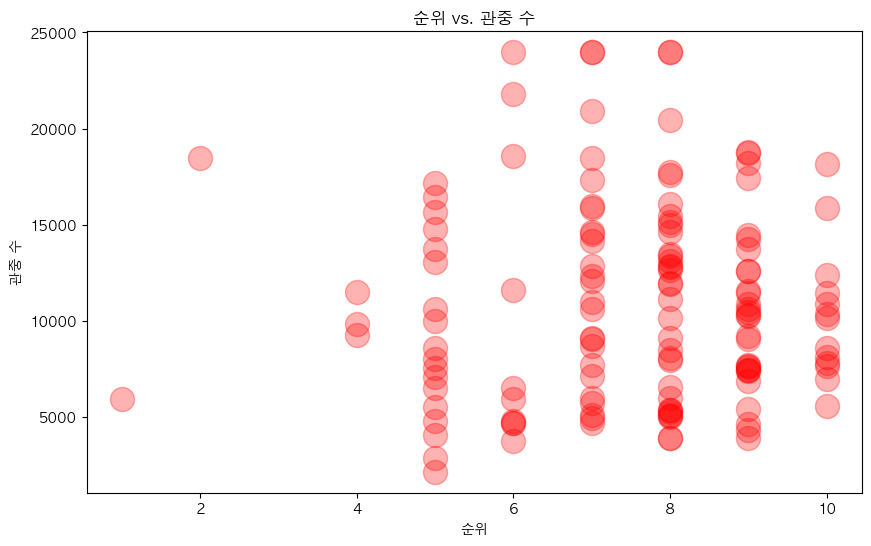

In [15]:
fontKorea()

# 월과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    samsung_2022_2023['순위'], 
    samsung_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('순위 vs. 관중 수')
plt.xlabel('순위')
plt.ylabel('관중 수')
plt.show()

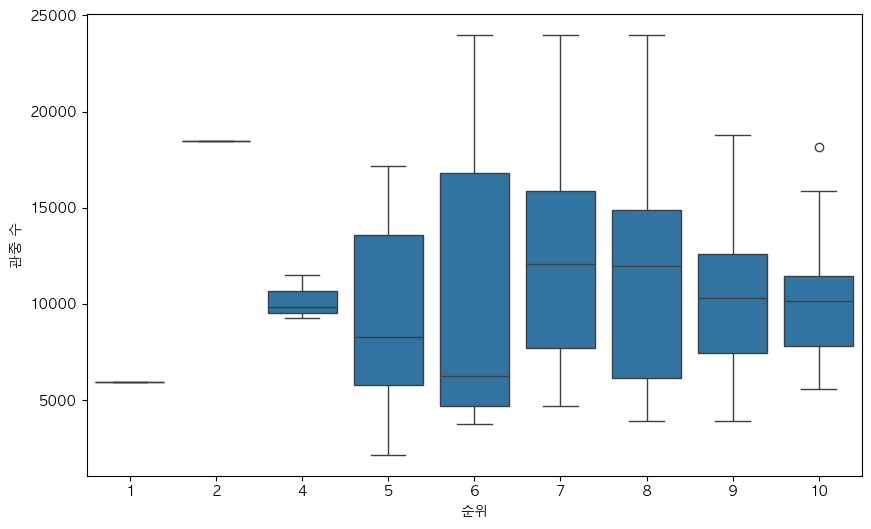

In [16]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='순위', y='관중 수', data=samsung_2022_2023)
plt.title('')
plt.show()

In [19]:
# 10월 데이터 삭제
hanwha_2022_2023 = \
    hanwha_2022_2023.drop(
        hanwha_2022_2023[
            hanwha_2022_2023['요일'] == '월'
        ].index
    )

In [20]:
# 10월 데이터 삭제
hanwha_2024 = \
    hanwha_2024.drop(
        hanwha_2024[
            hanwha_2024['요일'] == '월'
        ].index
    )

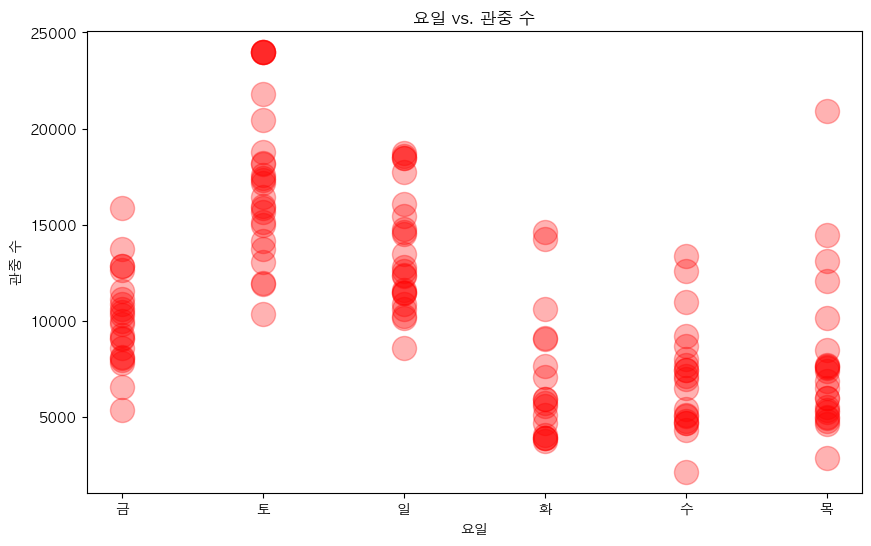

In [20]:
fontKorea()

# 월과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    samsung_2022_2023['요일'], 
    samsung_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('요일 vs. 관중 수')
plt.xlabel('요일')
plt.ylabel('관중 수')
plt.show()

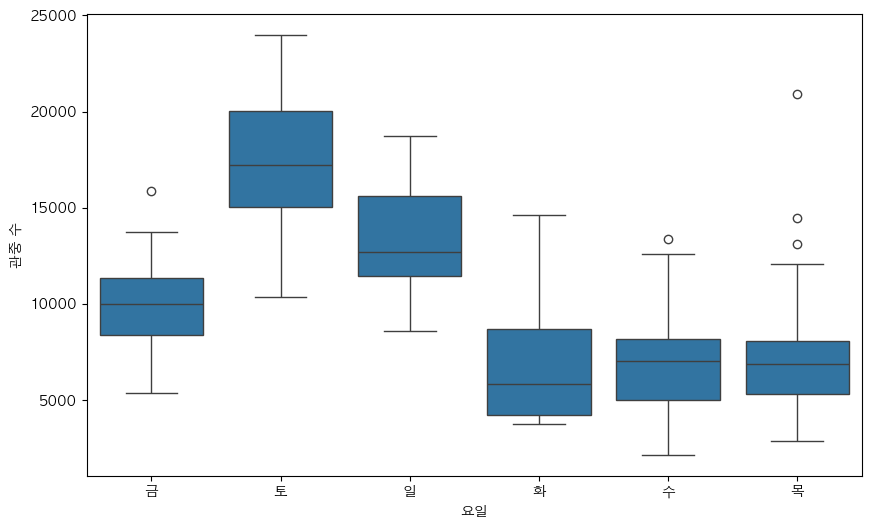

In [21]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='관중 수', data=samsung_2022_2023)
plt.title('')
plt.show()

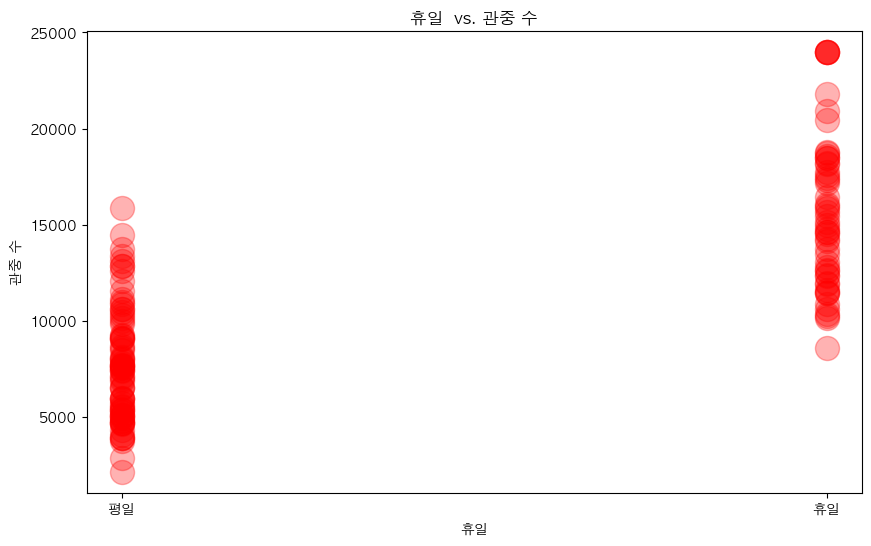

In [22]:
fontKorea()

# 휴일과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    samsung_2022_2023['휴일유무'], 
    samsung_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('휴일  vs. 관중 수')
plt.xlabel('휴일')
plt.ylabel('관중 수')
plt.show()

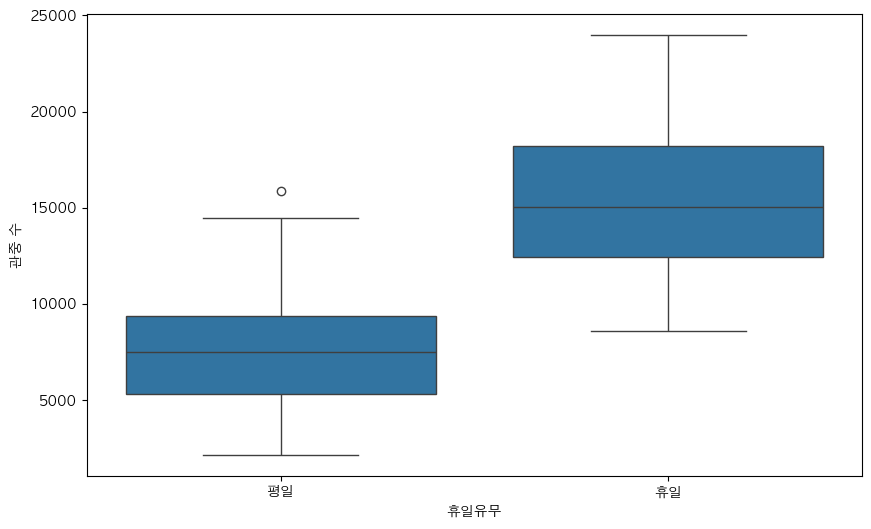

In [23]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='휴일유무', y='관중 수', data=samsung_2022_2023)
plt.title('')
plt.show()

In [24]:
# 요일을 숫자로 매핑
day_mapping = {
    '휴일': 1,
    '평일': 0
}

# '요일수치화' 컬럼 추가
samsung_2022_2023['휴일유무수치화'] = samsung_2022_2023['휴일유무'].map(day_mapping)
samsung_2024['휴일유무수치화'] = samsung_2024['휴일유무'].map(day_mapping)


In [25]:
# 순위을 숫자로 매핑
mapping = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 1,
    7 : 1,
    8 : 1,
    9 : 2,
    10 : 2,
}

# '상중하위권수치화'컬럼 추가
samsung_2022_2023['상중하위권수치화'] = samsung_2022_2023['순위'].map(mapping)
samsung_2024['상중하위권수치화'] = samsung_2024['순위'].map(mapping)

In [26]:
samsung_2022_2023[['관중 수','휴일유무수치화','상중하위권수치화']].corr()

,관중 수,휴일유무수치화,상중하위권수치화
관중 수,1.000000,0.751576,0.016215
휴일유무수치화,0.751576,1.000000,0.007659
상중하위권수치화,0.016215,0.007659,1.000000


In [27]:
# 요일을 숫자로 매핑
mapping = {
    '화': 0,
    '수': 0,
    '목': 0,
    '금': 1,
    '토': 1,
    '일': 1,

}

# '요일수치화' 컬럼 추가
samsung_2022_2023['화목_금일수치화'] = samsung_2022_2023['요일'].map(mapping)
samsung_2024['화목_금일수치화'] = samsung_2024['요일'].map(mapping)


In [28]:
samsung_2022_2023[['관중 수','휴일유무수치화','상중하위권수치화','화목_금일수치화']].corr()

,관중 수,휴일유무수치화,상중하위권수치화,화목_금일수치화
관중 수,1.000000,0.751576,0.016215,0.632193
휴일유무수치화,0.751576,1.000000,0.007659,0.659371
상중하위권수치화,0.016215,0.007659,1.000000,-0.029685
화목_금일수치화,0.632193,0.659371,-0.029685,1.000000


----
# k 값 찾기
----

In [29]:
samsung_2022_2023.isna().sum()

날짜          0
순위          0
요일          0
원정팀         0
관중 수        0
휴일유무        0
휴일유무수치화     0
상중하위권수치화    0
화목_금일수치화    0
dtype: int64

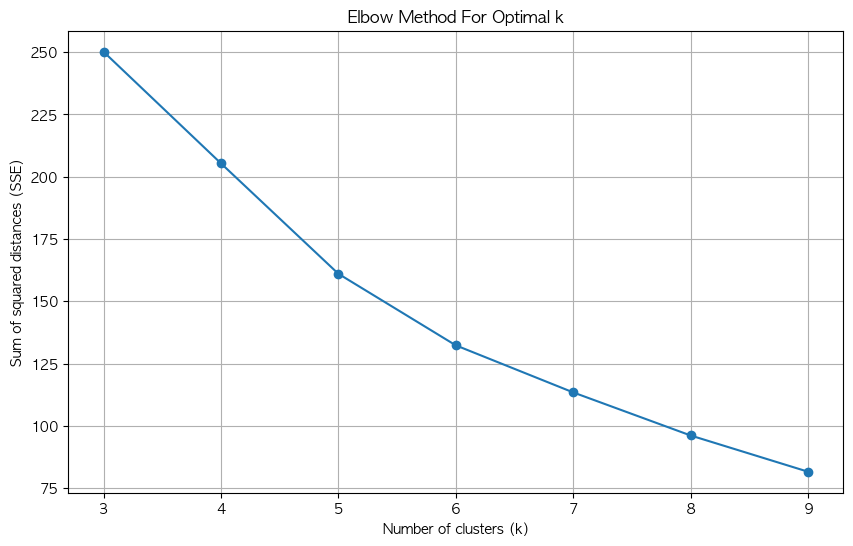

In [30]:
# 데이터 전처리
features = samsung_2022_2023[['관중 수','휴일유무수치화','상중하위권수치화','화목_금일수치화']]
target = samsung_2022_2023['관중 수']

# 관중 수 데이터를 reshape하여 2차원 배열로 전환
attendance_shape = np.array(target).reshape(-1, 1)

# features와 target과 결합 데이터
final_data = np.hstack((features, attendance_shape))

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_data)

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(3, 10)  # 3부터 15까지의 k 값에 대해 확인

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [33]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(attendance_shape)
clusters

# 각 클러스터의 관중 수 범위 계산
cluster_ranges = {}

for cluster in range(5):
    cluster_data = \
        samsung_2022_2023[clusters == cluster]
    min_attendance = \
        cluster_data['관중 수'].min()
    max_attendance = \
        cluster_data['관중 수'].max()
    cluster_ranges[cluster] = (min_attendance, max_attendance)
cluster_ranges

{0: (14155, 18789),
 1: (6515, 9244),
 2: (20468, 24000),
 3: (9838, 13765),
 4: (2156, 6006)}

In [34]:
sorted(cluster_ranges.items(), key=lambda item: item[1][0])

[(4, (2156, 6006)),
 (1, (6515, 9244)),
 (3, (9838, 13765)),
 (0, (14155, 18789)),
 (2, (20468, 24000))]

In [35]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
samsung_2022_2023['관중수분류'] = \
    pd.cut(samsung_2022_2023['관중 수'], 
    bins=[0,6100,9300,13800,18800,float('inf')], 
    labels=[
            '6000명 미만',
            '6000 ~ 9000명',
            '9000명 ~ 14000명',
            '14000명 ~ 20000명',
            '20000명 이상'

        ], 
    right=False)

In [36]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
samsung_2024['관중수분류'] = \
    pd.cut(samsung_2024['관중 수'], 
    bins=[0,6100,9300,13800,18800,float('inf')], 
    labels=[
            '6000명 미만',
            '6000 ~ 9000명',
            '9000명 ~ 14000명',
            '14000명 ~ 20000명',
            '20000명 이상'

        ], 
    right=False)

----
# 예측
----

In [37]:
# 훈련 데이터와 테스트 데이터 나눔
x = samsung_2022_2023[['휴일유무수치화','상중하위권수치화','화목_금일수치화']]
y = samsung_2022_2023['관중수분류']
test_x = samsung_2024[['휴일유무수치화','상중하위권수치화','화목_금일수치화']]
test_y = samsung_2024['관중수분류']

In [38]:
# 랜덤포레스트를 이용한 교차검증 10번 실시
cv_scores = []
for i in range(10):
    scores = cross_val_score(
        RandomForestClassifier(),
        x,
        y,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(round(scores.mean(),4)*100)
cv_scores

[50.660000000000004,
 51.370000000000005,
 49.95,
 51.43,
 52.86,
 52.86,
 52.09,
 49.89,
 50.660000000000004,
 52.800000000000004]

In [39]:
# 데이터 학습 시키고 예측하기
clf = RandomForestClassifier()
clf.fit(x,y)
clf.score(test_x, test_y)
pre = clf.predict(test_x)

# 정답률 구하기
# np.mean(pre == test_label)

ac_score = accuracy_score(test_y, pre)

print('정답률 =', ac_score)

정답률 = 0.0


In [40]:
# 데이터 학습 시키고 예측하기
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x,y)
knc.score(test_x, test_y)
pre = clf.predict(test_x)

# 정답률 구하기|
ac_score = accuracy_score(test_y, pre)

print('정답률 =', ac_score)

정답률 = 0.0


In [41]:
# 데이터 학습 시키고 예측하기
svm = SVC()
svm.fit(x,y)
svm.score(test_x, test_y)
pre = svm.predict(test_x)

# 정답률 구하기
ac_score = accuracy_score(test_y, pre)

print('정답률 =', ac_score)

정답률 = 0.0


In [ ]:
thiss = np.array([
    [1,1,0]
])

In [ ]:
svm.predict(thiss)

In [42]:
import joblib
filename = '../Data/predict_model/svm_samsung.h5'
joblib.dump(svm, filename)

['../Data/predict_model/svm_samsung.h5']